In [1]:
pip install xlrd

    100% |████████████████████████████████| 112kB 2.6MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
! pip install seaborn

    100% |████████████████████████████████| 215kB 10.1MB/s ta 0:00:01


In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
xls = pd.ExcelFile('NYSERDA_DER_Metric_Data.xlsx')

In [6]:
df1 = pd.read_excel(xls, 'Facilities')
df1.head()
df2 = pd.read_excel(xls, 'Systems')
df2.head()
df2.shape
df3 = pd.read_excel(xls, 'Projects')
df3.head()
df3.shape
df4 = pd.read_excel(xls, 'DE Resources')
df4.head()
df4.shape
df5 = pd.read_excel(xls, 'Ancillary Equipment')
df5.head()
df5.shape
df6 =  pd.concat([df1, df2], axis=1)
df7 = pd.concat([df6, df3], axis=1)
df8 = pd.concat([df7, df4], axis=1)
df9 = pd.concat([df8, df5], axis=1)
df9.shape
df9=df9.loc[:,~df9.columns.duplicated()]
df9.shape

(857, 118)

In [31]:
df9.dtypes

Facility ID                                                                             float64
Facility Name                                                                            object
Address Line 1                                                                           object
Address Line 2                                                                          float64
City                                                                                     object
State                                                                                    object
ZIP                                                                                      object
Latitude (°N)                                                                           float64
Longitude (°E)                                                                          float64
Total Rated Electric Generation (kW)                                                    float64
Total Rated Heat Generation (MBtu/h)    

In [32]:
df9.corr()

,Facility ID,Address Line 2,Latitude (°N),Longitude (°E),Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h),Total Rated Electrical Discharge Capacity (kW),Total Rated Electrical Storage Capacity (kWh),Total Rated Cooling Energy Discharge Capacity (ton),Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW),...,Chiller - Hot Water Driven,Chiller - Exhaust-Fired,Chiller - Steam Driven,Rated Electric Efficiency (% HHV),Rated CHP Efficiency (% HHV),Tilt (° from horizontal),Azimuth (° from North),Chiller ID,H2S Scrubber ID,Unit Name
Facility ID,1.000000,NaN,0.067454,0.082532,-0.017558,0.004383,0.057422,0.055128,NaN,0.059126,...,-0.032717,-0.017023,-0.202449,-0.059958,-0.357565,0.462403,0.009871,NaN,0.942300,NaN
Address Line 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude (°N),0.067454,NaN,1.000000,-0.610339,0.234773,-0.028850,0.022602,-0.033891,NaN,-0.030891,...,0.126398,-0.066749,0.149274,0.006625,0.233658,0.129472,0.060057,NaN,-0.085697,NaN
Longitude (°E),0.082532,NaN,-0.610339,1.000000,-0.155878,0.005281,0.038531,0.066207,NaN,-0.006346,...,0.029738,0.043640,-0.091306,0.003951,-0.016790,0.014656,-0.013846,NaN,0.011500,NaN
Total Rated Electric Generation (kW),-0.017558,NaN,0.234773,-0.155878,1.000000,0.157261,-0.027425,-0.025635,NaN,-0.035714,...,0.075079,-0.047247,-0.038959,0.098054,-0.017561,0.101021,-0.013876,NaN,0.399114,NaN
Total Rated Heat Generation (MBtu/h),0.004383,NaN,-0.028850,0.005281,0.157261,1.000000,-0.005307,-0.005002,NaN,-0.007077,...,0.115903,-0.023875,-0.033884,-0.095842,-0.128588,0.047895,0.000286,NaN,NaN,NaN
Total Rated Electrical Discharge Capacity (kW),0.057422,NaN,0.022602,0.038531,-0.027425,-0.005307,1.000000,0.380330,NaN,-0.005650,...,-0.032360,-0.007042,-0.009995,0.063739,0.065352,0.037695,-0.021912,NaN,NaN,NaN
Total Rated Electrical Storage Capacity (kWh),0.055128,NaN,-0.033891,0.066207,-0.025635,-0.005002,0.380330,1.000000,NaN,-0.005325,...,-0.032360,-0.007042,-0.009995,0.065032,0.053662,0.046449,0.000246,NaN,NaN,NaN
Total Rated Cooling Energy Discharge Capacity (ton),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW),0.059126,NaN,-0.030891,-0.006346,-0.035714,-0.007077,-0.005650,-0.005325,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,0.000137,-0.095312,NaN,NaN,NaN


In [9]:
df4['Primary Fuel'].value_counts().to_frame()
dfPrimaryFuel = df4[['Primary Fuel' , 'Total Rated Electric Generation (kW)', 'Total Rated Heat Generation (MBtu/h)' ]]
dfPrimaryFuelGeneration = dfPrimaryFuel.groupby(['Primary Fuel'],as_index=False).sum()
dfPrimaryFuelGeneration.sort_values(["Total Rated Electric Generation (kW)"], axis=0, ascending=False, inplace=True) 
dfPrimaryFuelGeneration


,Primary Fuel,Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h)
5,Solar,491777.332,0.000
3,Natural Gas,189087.685,346609.103
0,Digester Gas,15925.000,1000.000
2,Landfill Gas,7200.000,0.000
1,Distillate Oil,2200.000,0.000
4,Other Gas,825.000,0.000
6,Wind,250.000,0.000


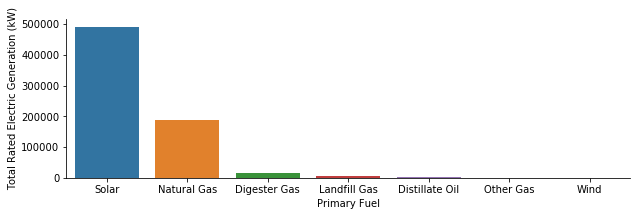

In [10]:
sns.catplot(x="Primary Fuel", y="Total Rated Electric Generation (kW)" ,height=3,aspect=3,kind="bar", data=dfPrimaryFuelGeneration ); 

### Total Electric Generation by Primary Fuel in the Descending order.

In [11]:
df9['Category'].value_counts().to_frame()
df10 = df9[['Category' , 'Facility Name' , 'Total Rated Electric Generation (kW)' , 'Total Rated Heat Generation (MBtu/h)']]
dfCategory_Generation = df10.groupby(['Category'],as_index=False).sum()
dfCategory_Generation
dfCategory_Generation.sort_values(["Total Rated Electric Generation (kW)"], axis=0, ascending=False, inplace=True) 

In [12]:
dfCategory_GenerationTop5 = dfCategory_Generation.head()
dfCategory_GenerationTop5

,Category,Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h)
11,Offsite Resource,241833.180,0.0
1,Education,140081.830,4133.0
12,Public Assembly,46939.460,2351.0
17,Utilities Water and Waste Management,43039.705,1000.0
7,Manufacturing,41043.371,29186.0


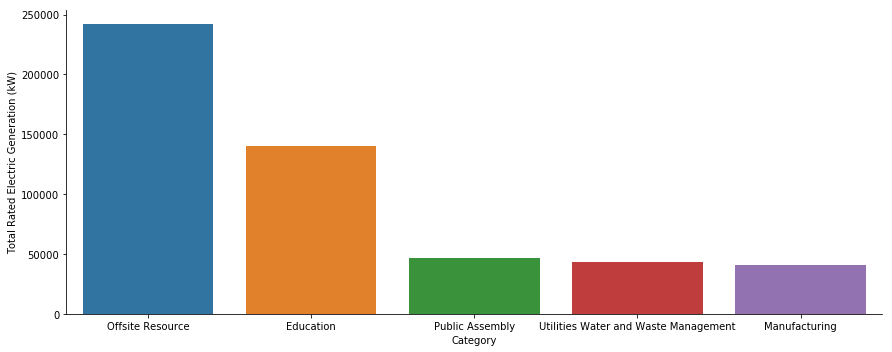

In [13]:
sns.catplot(x="Category", y="Total Rated Electric Generation (kW)" ,height=5,aspect=2.5,kind="bar", data=dfCategory_GenerationTop5 ); 

### Top 5 Categories who has contributed the most in Electric Generation 

In [14]:
dfFacility = df9[['Facility Name' , 'Total Rated Electric Generation (kW)' , 'Total Rated Heat Generation (MBtu/h)']]
dfFacility.head(10)
dfFacility.sort_values(["Total Rated Electric Generation (kW)"], axis=0, ascending=False, inplace=True) 
dfFacility.head(10)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Facility Name,Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h)
17,Coop City - Riverbay Corp.,37500.0,0.0
31,Cornell University,30000.0,0.0
625,General Electric (19th Hole Solar),10460.0,0.0
626,NYU Langone Medical Center,9820.0,127000.0
359,Hudson Valley Community College,7845.0,0.0
427,NY Presbyterian Hospital,7500.0,0.0
768,Delaware River Solar - Millard Hill Road,7484.1,0.0
29,One Penn Plaza,6165.0,0.0
643,"SUNY RF, on behalf of SUNY Polytechnic - 218 B...",5657.6,0.0
374,Cornell University Agricultural Experiment Sta...,5654.4,0.0


In [15]:
dfFacilityTOP5 = dfFacility.head(5)
dfFacilityTOP5

,Facility Name,Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h)
17,Coop City - Riverbay Corp.,37500.0,0.0
31,Cornell University,30000.0,0.0
625,General Electric (19th Hole Solar),10460.0,0.0
626,NYU Langone Medical Center,9820.0,127000.0
359,Hudson Valley Community College,7845.0,0.0


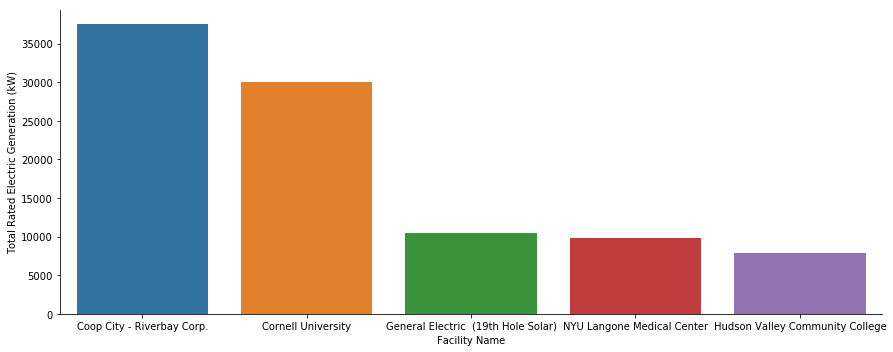

In [16]:
sns.catplot(x="Facility Name", y="Total Rated Electric Generation (kW)" , height=5 , aspect=2.5 ,kind="bar", data=dfFacilityTOP5);


### Top 5 Facility Name who has generated Electricity the most

In [17]:

dfZone = df9['NYISO Zone'].value_counts().to_frame()
dfZone =  df9[['NYISO Zone' , 'Latitude (°N)' , 'Longitude (°E)' , 'Total Rated Electric Generation (kW)' , 'Total Rated Heat Generation (MBtu/h)' ]]
dfZone_Generation = dfZone.groupby(['NYISO Zone'],as_index=False).sum()
dfZone_Generation.sort_values(["Total Rated Electric Generation (kW)"], axis=0, ascending=False, inplace=True) 
dfZone_Generation


,NYISO Zone,Latitude (°N),Longitude (°E),Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h)
5,F - Capital,3985.990564,-6873.447127,166609.645,0.000
9,J - New York City,11892.797368,-21594.745434,143977.732,249247.103
2,C - Central,3289.769398,-5884.698151,121838.725,94034.000
4,E - Mohawk Valley,2079.047549,-3613.936506,69534.710,1363.000
1,B - Genessee,1893.270355,-3406.928275,62128.405,0.000
0,A - West,1927.429357,-3529.690928,56530.320,0.000
6,G - Hudson Valley,5066.257171,-9041.186535,54703.625,204.000
8,I - Dunwoodie,1845.401866,-3320.493875,16846.595,2353.000
10,K - Long Island,1142.985924,-2049.835623,7153.060,0.000
7,H - Millwood,576.917862,-1034.200449,3771.900,408.000


In [18]:
dfZone_Generationtop5 = dfZone_Generation.head()
dfZone_Generationtop5

,NYISO Zone,Latitude (°N),Longitude (°E),Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h)
5,F - Capital,3985.990564,-6873.447127,166609.645,0.000
9,J - New York City,11892.797368,-21594.745434,143977.732,249247.103
2,C - Central,3289.769398,-5884.698151,121838.725,94034.000
4,E - Mohawk Valley,2079.047549,-3613.936506,69534.710,1363.000
1,B - Genessee,1893.270355,-3406.928275,62128.405,0.000


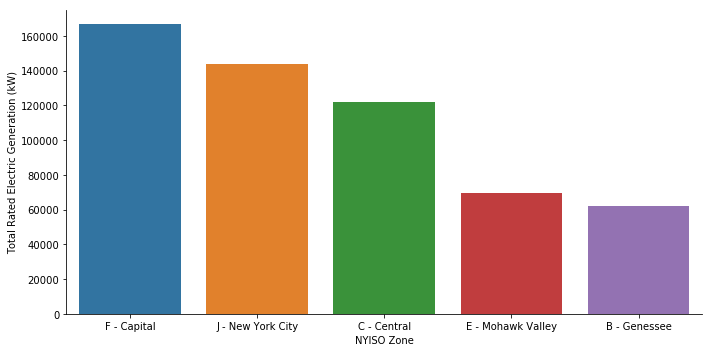

In [19]:
sns.catplot(x="NYISO Zone", y="Total Rated Electric Generation (kW)" ,height=5,aspect=2,kind="bar", data=dfZone_Generationtop5 ); 

### Electricity generated the most by ZONE.

In [20]:
dfDeveloper = df3[['Developer' , 'Project Rated Electric Generation (kW)']]
dfDeveloperGeneration = dfDeveloper.groupby(['Developer'],as_index=False).sum()
dfDeveloperGeneration.sort_values(["Project Rated Electric Generation (kW)"], axis=0, ascending=False, inplace=True) 
dfDeveloperGeneration.head()

,Developer,Project Rated Electric Generation (kW)
63,ForeFront Power,53015.475
137,Riverbay Corp.,37500.000
24,"Borrego Solar (formerly SEC Newco, LLC)",32385.470
41,Cornell University,30000.000
149,Solar Liberty,27330.370


In [21]:
dfDeveloperGenerationtop5 = dfDeveloperGeneration.head()
dfDeveloperGenerationtop5

,Developer,Project Rated Electric Generation (kW)
63,ForeFront Power,53015.475
137,Riverbay Corp.,37500.000
24,"Borrego Solar (formerly SEC Newco, LLC)",32385.470
41,Cornell University,30000.000
149,Solar Liberty,27330.370


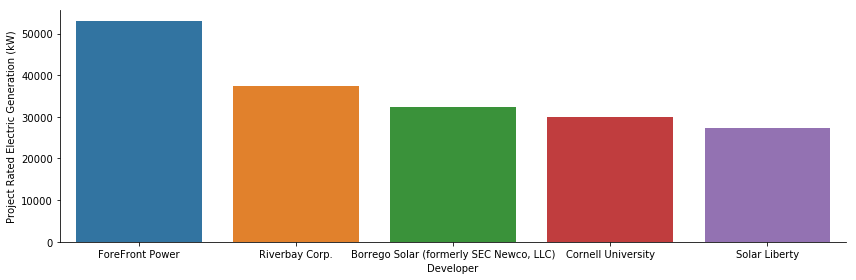

In [22]:
sns.catplot(x="Developer", y="Project Rated Electric Generation (kW)" ,height=4,aspect=3,kind="bar", data=dfDeveloperGenerationtop5 ); 

### Electric Generation by Developer in the Descending order

In [23]:
dfTechnology = df3['Technology'].value_counts().to_frame()
dfTechnology =  df9[['Technology' ,'Project Rated Electric Generation (kW)' , 'Project Rated Heat Generation (MBtu/h)' ]]
dfTechnology_Generation = dfTechnology.groupby(['Technology'],as_index=False).sum()
dfTechnology_Generation.sort_values(["Project Rated Electric Generation (kW)"], axis=0, ascending=False, inplace=True) 
dfTechnology_Generation

,Technology,Project Rated Electric Generation (kW),Project Rated Heat Generation (MBtu/h)
4,Solar PV,497679.517,0.000
1,CHP,185894.000,346609.103
0,ADG,15515.000,1000.000
3,Fuel Cell,11782.500,0.000
2,Energy Storage,0.000,0.000


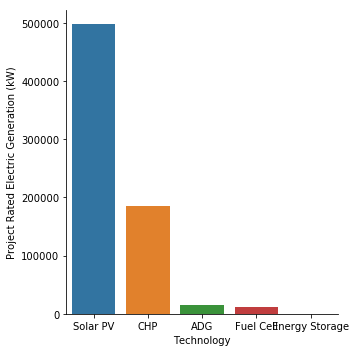

In [24]:
sns.catplot(x="Technology", y="Project Rated Electric Generation (kW)",  kind="bar", data=dfTechnology_Generation);

### Solar PV has contributed the most in Electric Generation.

In [25]:

dfGenerator = df9['Generator'].value_counts().to_frame()
dfGenerator =  df9[['Generator' ,'Total Rated Electric Generation (kW)' , 'Total Rated Heat Generation (MBtu/h)' ]]
dfGenerator_Generation = dfGenerator.groupby(['Generator'],as_index=False).sum()
dfGenerator_Generation.sort_values(["Total Rated Electric Generation (kW)"], axis=0, ascending=False, inplace=True) 
dfGenerator_Generation

,Generator,Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h)
1,Inverter,473461.444,195422.500
0,Induction Generator,36767.590,4144.000
2,Synchronous Generator,35165.723,100238.803


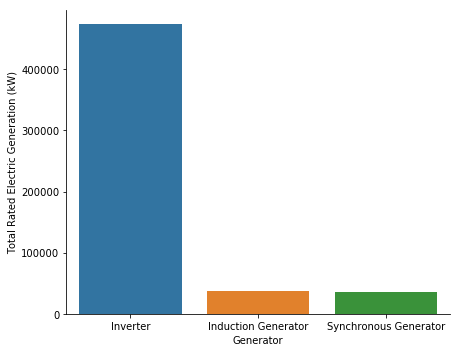

In [26]:
sns.catplot(x="Generator", y="Total Rated Electric Generation (kW)",height=5,aspect=1.3 ,  kind="bar", data=dfGenerator_Generation);


### Invereter has contributed the most while generating overall Electricity

### PLot of Primary Fuel vs Category vs Total Rated Electric Generation (kW)

In [27]:
grouped_pivot = df9.pivot_table(index='Primary Fuel', columns='Category', values='Total Rated Electric Generation (kW)') 

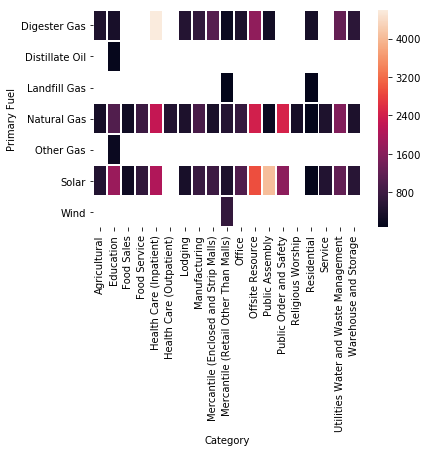

In [28]:
ax = sns.heatmap(grouped_pivot , linewidth=1)

The plot clearly shows that Health Care(Intpatient) Category makes maximum use of DIgester Gas as a Primary fuel which in turn results in maximum electricity generation.

### PLot of Primary Fuel vs Zone vs Total Rated Electric Generation (kW)

In [29]:
grouped_pivot1 = df9.pivot_table(index='Primary Fuel', columns='NYISO Zone', values='Total Rated Electric Generation (kW)') 

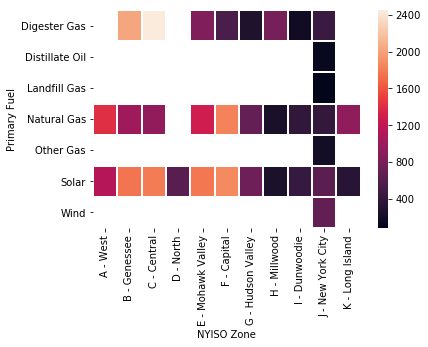

In [30]:
ax1 = sns.heatmap(grouped_pivot1 , linewidth=1)

The plot clearly shows that primary fuel"Digester Gas" in C-Central Zone contributes in maximum electricity generation.